In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

download data set from this link

[h1b.csv](https://drive.google.com/file/d/1GHotByxQaCXKPAuNI7dqIMiOMdmnkOzN/view?usp=sharing)

### read csv in Pandas DataFrame 

In [2]:
df = pd.read_csv('h1b.csv')

In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


### show columns

In [4]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### delete 'unnamed:0'  column from data set

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## check no of rows in data frame

In [6]:
df.shape[0]

3002458

## Drop All rows which has any NA value and show first 5 rows after this operation

In [7]:
df.dropna(how='any',inplace=True)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


## reset index and check how many rows you have 

In [8]:
df.reset_index()
df.shape[0]

2877765

## Write a code to find out top 15 hiring company (Employer Name) 

In [9]:
top_hiring = df['EMPLOYER_NAME'].value_counts().reset_index().head(15)
top_hiring.columns = ['name','freq']
top_hiring

,name,freq
0,INFOSYS LIMITED,130257
1,TATA CONSULTANCY SERVICES LIMITED,64273
2,WIPRO LIMITED,45673
3,DELOITTE CONSULTING LLP,35999
4,IBM INDIA PRIVATE LIMITED,33585
5,ACCENTURE LLP,33226
6,MICROSOFT CORPORATION,25551
7,"HCL AMERICA, INC.",22488
8,ERNST & YOUNG U.S. LLP,18094
9,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17322


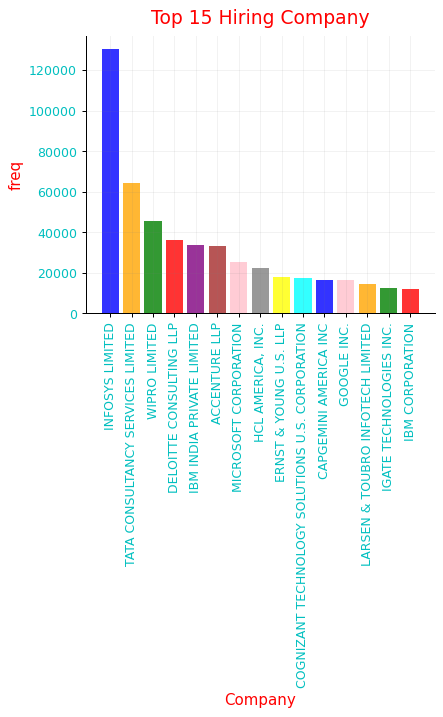

In [10]:
fig, ax = plt.subplots(figsize=(5,4),dpi= 90)
ax.bar('name','freq', data = top_hiring,
      color=['blue','orange','green','red','purple',
             'brown','pink','gray','yellow','cyan',
            'blue','pink','orange','green','red'],alpha=0.8)
ax.set_xticks(np.arange(0,15),top_hiring['name'],rotation=90,color='c')
ax.set_yticks(np.arange(0, 140000, 20000),np.arange(0, 140000,20000),color='c')
ax.set_title('Top 15 Hiring Company', color='red',fontsize= 15, pad = 10)
ax.grid(color='gray',alpha=0.1)
ax.spines[['top','right']].set_visible(False)
ax.set_xlabel("Company",color='red',fontsize=12)
ax.set_ylabel("freq",color='red',fontsize=12)

plt.show()

### Top 15 companies which provide highest PREVALING WAGE

In [11]:
prev = df['PREVAILING_WAGE'].value_counts().head(15)
prev.head(5)

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

In [12]:
prev = prev.reset_index()
prev.columns = ['prevaling wage','count']
prev

,prevaling wage,count
0,60000.0,10185
1,55245.0,6745
2,62566.0,6480
3,58053.0,5683
4,52499.0,5492
5,51730.0,5407
6,63877.0,5377
7,65042.0,5276
8,55370.0,4961
9,67808.0,4646


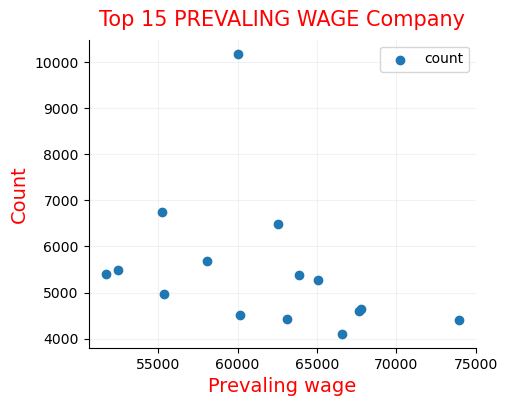

In [13]:
font_dict_label= {'color':'r','fontsize':14}

fig, ax1 = plt.subplots(figsize=(5,4))
ax1.scatter('prevaling wage','count', data = prev)

ax1.set_title('Top 15 PREVALING WAGE Company', color='red',pad = 10, fontsize = 15)
ax1.set_xlabel('Prevaling wage',fontdict = font_dict_label)
ax1.set_ylabel('Count', fontdict=font_dict_label)
ax1.spines[['top','right']].set_visible(False)

ax1.grid(color='gray',alpha=0.1)
ax1.legend()
plt.show()

##### Average PREVAILING WAGE

In [14]:
df['PREVAILING_WAGE'].mean()

145166.64888401062

In [15]:
employer = df.groupby('EMPLOYER_NAME').agg({
    'PREVAILING_WAGE':'mean'
}).reset_index().sort_index(axis=1).sort_values('PREVAILING_WAGE',ascending=False)[:15]
employer.head()

,EMPLOYER_NAME,PREVAILING_WAGE
138732,OMPI OF AMERICA INC.,212987840.0
93068,INNOBOX SYSTEMS,172363360.0
21258,BAALAAJEE INC.,143440766.0
52672,DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,134702089.5
22917,BAYSHORE GLOBAL MANAGEMENT LLC,126235824.0


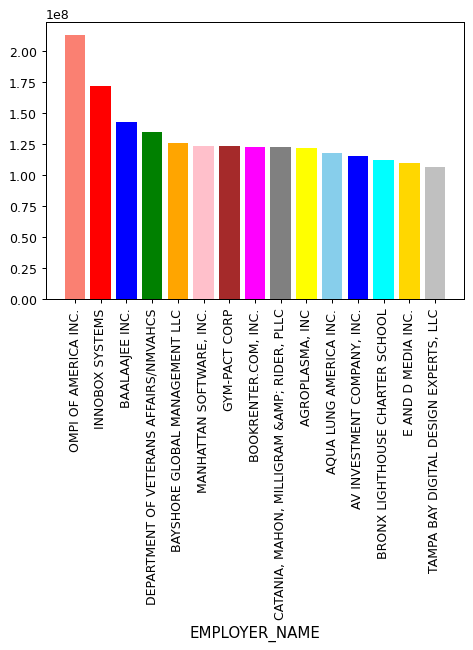

In [16]:
fig, ax = plt.subplots(figsize=(6,4),dpi=90)
col = ['salmon','red','blue','green','orange','pink','brown','magenta','gray','yellow','skyblue','blue','cyan','gold','silver']
ax.bar('EMPLOYER_NAME','PREVAILING_WAGE',data = employer, color=col)
ax.set_xticks(np.arange(0,15),employer['EMPLOYER_NAME'],rotation = 90)
ax.set_xlabel('EMPLOYER_NAME', fontsize=12)
plt.show()

In [17]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Top 20 WORKSITE 

In [18]:
data = df['WORKSITE'].value_counts().reset_index().head(20)
data.columns = ['WORKSITE','freq']
data

,WORKSITE,freq
0,"NEW YORK, NEW YORK",190863
1,"HOUSTON, TEXAS",83385
2,"SAN FRANCISCO, CALIFORNIA",62457
3,"ATLANTA, GEORGIA",52008
4,"CHICAGO, ILLINOIS",51167
5,"SAN JOSE, CALIFORNIA",49582
6,"SUNNYVALE, CALIFORNIA",34968
7,"DALLAS, TEXAS",31509
8,"BOSTON, MASSACHUSETTS",31336
9,"REDMOND, WASHINGTON",30574


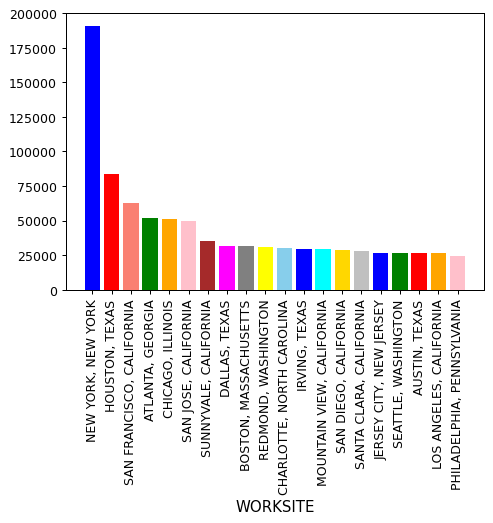

In [19]:
fig, ax = plt.subplots(figsize=(6,4),dpi=90)
col = ['blue','red','salmon','green','orange','pink','brown','magenta',
       'gray','yellow','skyblue','blue','cyan','gold','silver',
      'blue','green','red','orange','pink']

ax.bar('WORKSITE','freq',data = data, color=col)
ax.set_xticks(np.arange(0,20),data['WORKSITE'],rotation = 90)
ax.set_xlabel('WORKSITE', fontsize=12)
plt.show()

### head of Worksite Column

In [20]:
df['WORKSITE'].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

### Show Column Names

In [21]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Apply a Function on DataFrame to gather only State Name from Worksite

    eg. worksite name current -  SAN FRANCISCO, CALIFORNIA
        worksite name after - CALIFORNIA
        
**note**: there sholud not be any space at the begning or end of worksite name

In [22]:
def extract_state(worksite):
    return worksite.split(', ')[-1]

In [23]:
df['WORKSITE'] = df['WORKSITE'].apply(extract_state)

In [24]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003


**note:** if you view your analysis than you will find that 'MARIANA ISLANDS' worksite name is replaced with NA values

In [25]:
df.loc[df['WORKSITE']=='MARIANA ISLANDS']

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat


In [26]:
df.loc[df['WORKSITE']=='NA']

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
212,CERTIFIED,ALTISOURCE ASSET MANAGEMENT CORPORATION,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,180502.0,2016.0,NA,-64.703198,17.746640
294,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,SENIOR VICE PRESIDENT OF HOTEL OPERATIONS,Y,165920.0,2016.0,NA,145.729789,15.151515
297,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,VICE PRESIDENT OF HOTEL OPERATIONS,Y,165920.0,2016.0,NA,145.729789,15.151515
304,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,"SENIOR VICE PRESIDENT, INFORMATION TECHNOLOGY",Y,214790.0,2016.0,NA,145.729789,15.151515
307,CERTIFIED,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,SENIOR VICE PRESIDENT OF HOTEL OPERATIONS,Y,214790.0,2016.0,NA,145.729789,15.151515
...,...,...,...,...,...,...,...,...,...,...
3001749,DENIED,"TUMON BAY RESORT & SPA, LLC","Teachers and Instructors, All Other*",LANGUAGE INSTRUCTOR,Y,35440.0,2011.0,NA,144.787869,13.497020
3001846,DENIED,PSG PROFESSIONAL CORPORATION,General and Operations Managers,GENERAL MANAGER,Y,4795086.4,2011.0,NA,145.729789,15.151515
3001874,DENIED,"VEOLIA WATER NORTH AMERICA OPERATING SERVICES,...",General and Operations Managers,PROJECT MANAGER II,Y,71822.0,2011.0,NA,-64.703198,17.746640
3002290,DENIED,"WHITE COCONUT COMPUTER SERVICES, INC.",Accountants and Auditors,ACCOUNTANT,Y,39478.4,2011.0,NA,145.729789,15.151515


### Replace all NA records in your Worksite Column with Value  'MARIANA ISLANDS' 


In [27]:
df['WORKSITE'] = df['WORKSITE'].replace('NA','MARIANA ISLANDS')
df

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002440,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,CALIFORNIA,-122.245536,37.536413
3002441,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,UTAH,-112.001050,40.691613
3002442,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,OHIO,-81.519005,41.081445
3002443,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,MASSACHUSETTS,-71.367284,42.599814


In [28]:
df.loc[df['WORKSITE']=='MARIANA ISLANDS']

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
212,CERTIFIED,ALTISOURCE ASSET MANAGEMENT CORPORATION,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,180502.0,2016.0,MARIANA ISLANDS,-64.703198,17.746640
294,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,SENIOR VICE PRESIDENT OF HOTEL OPERATIONS,Y,165920.0,2016.0,MARIANA ISLANDS,145.729789,15.151515
297,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,VICE PRESIDENT OF HOTEL OPERATIONS,Y,165920.0,2016.0,MARIANA ISLANDS,145.729789,15.151515
304,WITHDRAWN,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,"SENIOR VICE PRESIDENT, INFORMATION TECHNOLOGY",Y,214790.0,2016.0,MARIANA ISLANDS,145.729789,15.151515
307,CERTIFIED,IMPERIAL PACIFIC INTERNATIONAL CNMI,CHIEF EXECUTIVES,SENIOR VICE PRESIDENT OF HOTEL OPERATIONS,Y,214790.0,2016.0,MARIANA ISLANDS,145.729789,15.151515
...,...,...,...,...,...,...,...,...,...,...
3001749,DENIED,"TUMON BAY RESORT & SPA, LLC","Teachers and Instructors, All Other*",LANGUAGE INSTRUCTOR,Y,35440.0,2011.0,MARIANA ISLANDS,144.787869,13.497020
3001846,DENIED,PSG PROFESSIONAL CORPORATION,General and Operations Managers,GENERAL MANAGER,Y,4795086.4,2011.0,MARIANA ISLANDS,145.729789,15.151515
3001874,DENIED,"VEOLIA WATER NORTH AMERICA OPERATING SERVICES,...",General and Operations Managers,PROJECT MANAGER II,Y,71822.0,2011.0,MARIANA ISLANDS,-64.703198,17.746640
3002290,DENIED,"WHITE COCONUT COMPUTER SERVICES, INC.",Accountants and Auditors,ACCOUNTANT,Y,39478.4,2011.0,MARIANA ISLANDS,145.729789,15.151515


### Print out how many unique Worksites are there

In [29]:
df['WORKSITE'].nunique()

53

##### show column names 

In [30]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

#### Rename you column names as

    {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}

In [31]:
df.rename(columns={
    'EMPLOYER_NAME':'EMPLOYER',
    'FULL_TIME_POSITION':'FULL_T',
    'PREVAILING_WAGE':'PREV_WAGE',
    'WORKSITE':'STATE',
    'lon':'LON',
    'lat':'LAT'
},inplace=True)

In [32]:
df.head()

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003


#### Now Remove all Columns Except these columns 

    'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

In [33]:
df = df.loc[:,['CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"]]

In [34]:
df.head()

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,2016.0,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"PORTS AMERICA GROUP, INC.",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,2016.0,COLORADO,CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",-104.990251,39.739236
4,WITHDRAWN,2016.0,MISSOURI,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,PEABODY INVESTMENTS CORP.,-90.199404,38.627003


In [35]:
df.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

#### Perform These Operations 

    Precise LON and LAT columns upto 2 decimal palaces
    
    Convert YEAR Column into String
    
    Convert PREV_WAGE column into Integer

In [36]:
## Precise LON and LAT columns upto 2 decimal palaces
df['LON'] = df['LON'].round(2)
df['LAT'] = df['LAT'].round(2)
df.head(2)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.70,33.02


In [37]:
## Convert YEAR Column into String
df['YEAR'] = df['YEAR'].astype(str)
df.head(2)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.70,33.02


In [38]:
## Convert PREV_WAGE column into Integer
df['PREV_WAGE'] = df['PREV_WAGE'].astype(int)
df.head(2)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02


__show top 3 values to check above operations__

In [39]:
df.head(3)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016.0,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73


### __show unique values of CASE_STATUS Column__

In [40]:
df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

# Calculate the petitions distributions by status

In [41]:
count = df['CASE_STATUS'].value_counts()
count

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [42]:
petition_dist = df['CASE_STATUS'].value_counts().tolist()
petition_dist

[2512114, 195721, 85161, 84752, 15, 1, 1]

In [43]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

#### PETITIONS BY CASE STATUS

In [44]:
des_cat = ['CERTIFIED','CERTIFIED-WITHDRAWN','DENIED','WITHDRAWN']
df1 = df[df['CASE_STATUS'].isin(des_cat)]
df1 = df1['CASE_STATUS'].value_counts()
df1

CERTIFIED              2512114
CERTIFIED-WITHDRAWN     195721
DENIED                   85161
WITHDRAWN                84752
Name: CASE_STATUS, dtype: int64

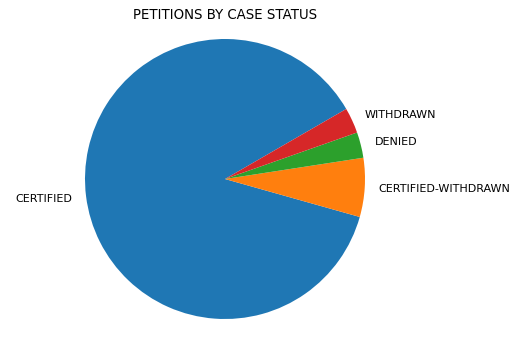

In [45]:
fig, ax = plt.subplots(dpi = 80, figsize= (7,5))
ax.pie(df1,labels =df1.index,startangle=30)
plt.title('PETITIONS BY CASE STATUS')
plt.axis('equal')
plt.show()

# Calculating the petitions distributions by year

In [46]:
count = df['YEAR'].value_counts().sort_values().to_list()
count

[333625, 394267, 422427, 498027, 600120, 629299]

Text(0.5, 1.0, 'petitions distributions by year')

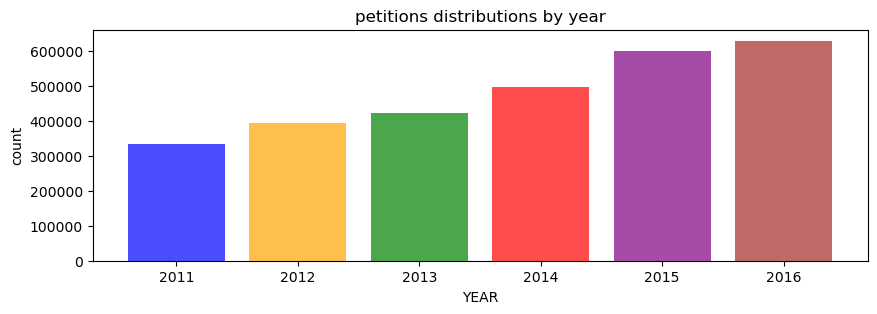

In [47]:
fig, ax = plt.subplots(figsize = (10,3))
ax.bar( df['YEAR'].value_counts().sort_values().index, df['YEAR'].value_counts().sort_values(),
      color = ['blue','orange','green','red','purple','brown'],alpha = 0.7)
ax.set_xlabel('YEAR')
ax.set_xticks( df['YEAR'].value_counts().sort_values().index,np.arange(2011,2017))
ax.set_ylabel('count')
ax.set_title('petitions distributions by year')

In [48]:
import seaborn as sn

<Axes: title={'center': 'petitions distributions by year'}, ylabel='count'>

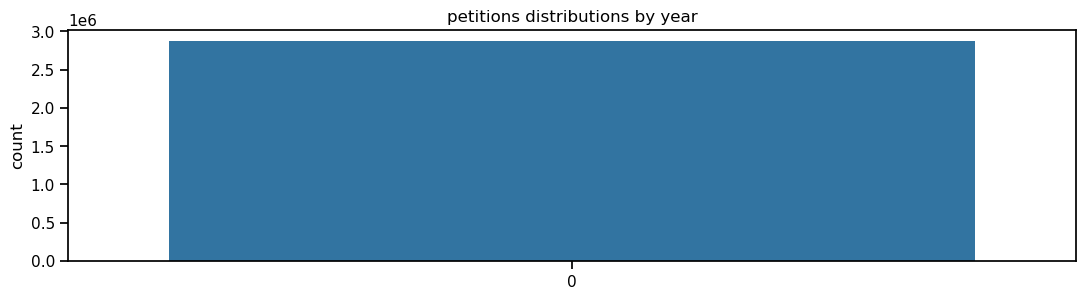

In [49]:
sn.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('petitions distributions by year')
sn.countplot(df['YEAR'])

In [50]:
denied = df[df.CASE_STATUS == 'DENIED']
len(denied)

85161

In [51]:
denied.head()

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
39,DENIED,2016.0,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,"PARALLELS, INC.",-122.22,47.48
47,DENIED,2016.0,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683,RANCHO LA PUERTA LLC,-117.16,32.72
95,DENIED,2016.0,ILLINOIS,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,BAKER & MCKENZIE PC,-87.63,41.88
98,DENIED,2016.0,FLORIDA,CHIEF EXECUTIVES,VP DIGITAL STRATEGY,Y,202363,"MANITOWOC FSG OPERATIONS, LLC",-82.72,28.24
110,DENIED,2016.0,NEW YORK,CHIEF EXECUTIVES,OPERATIONS DIRECTOR,Y,74276,TMS PLUMBING AND HEATING CORP,-74.01,40.71


In [52]:
del denied['CASE_STATUS']

In [53]:
denied = denied.reset_index()
denied.head(3)

,index,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,39,2016.0,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,"PARALLELS, INC.",-122.22,47.48
1,47,2016.0,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683,RANCHO LA PUERTA LLC,-117.16,32.72
2,95,2016.0,ILLINOIS,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,BAKER & MCKENZIE PC,-87.63,41.88


In [54]:
denied_year_count = [0]* 6

In [55]:
df.head(2)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02


In [56]:
for i in range(0,6):
    year = 2011.0+i
    denied_year_count[i] = denied[denied['YEAR']==str(year)]['YEAR'].count()

In [57]:
denied_year_count

[25986, 18866, 10976, 10816, 10037, 8480]

In [58]:
denied_year_count

[25986, 18866, 10976, 10816, 10037, 8480]

### Denied PETITIONS DISTRIBUTION BY YEAR

Text(0.5, 1.0, 'Denied petitions distribution by year')

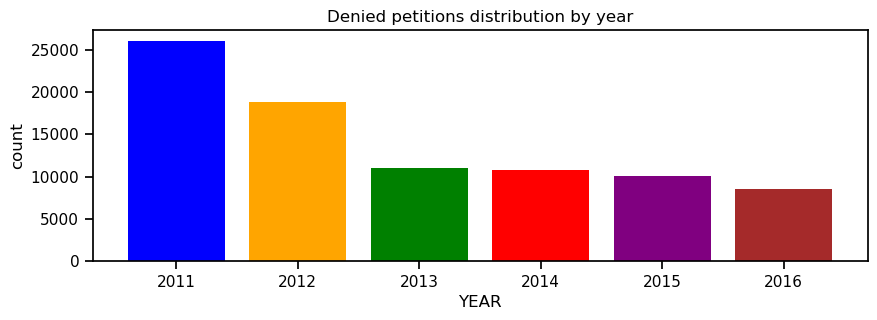

In [59]:
fig, ax = plt.subplots(figsize = (10,3))
ax.bar( denied['YEAR'].value_counts().index, denied_year_count,
      color = ['blue','orange','green','red','purple','brown'])
ax.set_xlabel('YEAR')
ax.set_xticks( denied['YEAR'].value_counts().index,np.arange(2011,2017))
ax.set_ylabel('count')
ax.set_title('Denied petitions distribution by year')

#### Denied % Rate By Year

In [60]:
tp = df['YEAR'].value_counts().sort_index()

In [61]:
denied_y = denied['YEAR'].value_counts().sort_index()
denied_y

2011.0    25986
2012.0    18866
2013.0    10976
2014.0    10816
2015.0    10037
2016.0     8480
Name: YEAR, dtype: int64

In [62]:
year = range(2011, 2017)
denied_per = round((denied_y / tp) * 100, 2)
per_de = pd.DataFrame({'year': year,
                       'denied rate %': denied_per})

pd.pivot_table(per_de,columns='year',values='denied rate %' )

year,2011,2012,2013,2014,2015,2016
denied rate %,7.79,4.79,2.6,2.17,1.67,1.35


Text(0, 0.5, 'denied rate %')

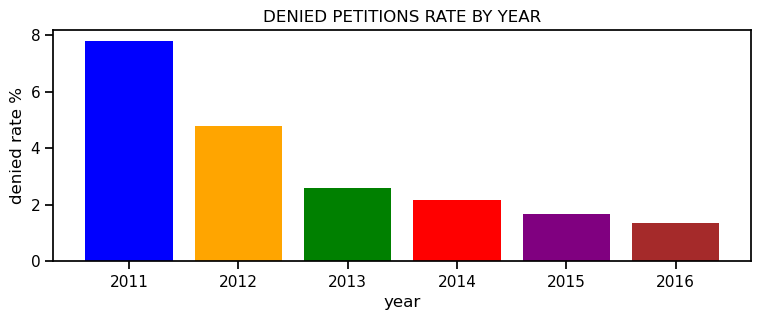

In [63]:
fig,ax = plt.subplots(figsize=(9,3))
ax.bar(year, denied_per, color=['blue','orange','green','red','purple','brown'])
ax.set_title('DENIED PETITIONS RATE BY YEAR')
ax.set_xlabel('year')
ax.set_ylabel('denied rate %')

## Calculate the number of petitions filed by the States

In [64]:
df.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

**unique stats sorted**

In [65]:
np.sort(df['STATE'].unique())


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARIANA ISLANDS', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype=object)

In [66]:
df['STATE'].nunique()

53

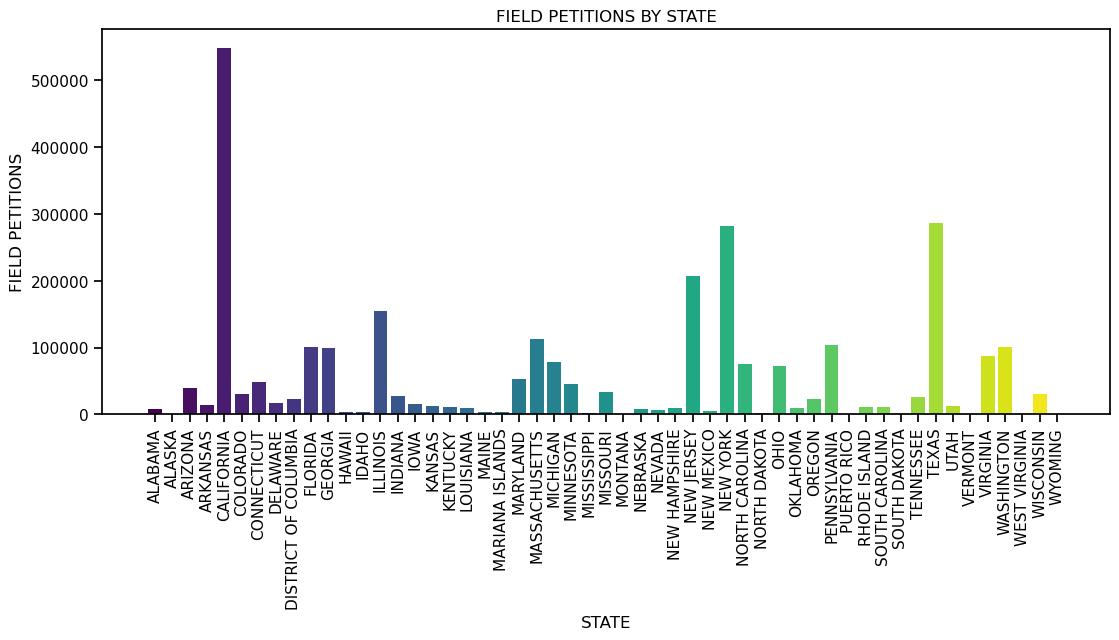

In [67]:
state_counts = df['CASE_STATUS'].groupby(df['STATE']).count().reset_index()
state_counts.sort_values(by='CASE_STATUS',ascending=False)

num_bars = len(state_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

fig, ax = plt.subplots(figsize=(13,5))
ax.bar(state_counts['STATE'],state_counts['CASE_STATUS'], color=colors)
ax.set_xlabel('STATE')
ax.set_ylabel('FIELD PETITIONS')
ax.set_title('FIELD PETITIONS BY STATE')
ax.set_xticks(state_counts['STATE'],state_counts['STATE'],rotation=90)
plt.show()

# Number of petitions denied by the state

__total denied petitions__

In [68]:
denied['STATE'].count()

85161

In [69]:
denied_state = denied['STATE'].value_counts().reset_index()
denied_state.columns=['STATE','Count']
denied_state = denied_state.sort_values(by='STATE')

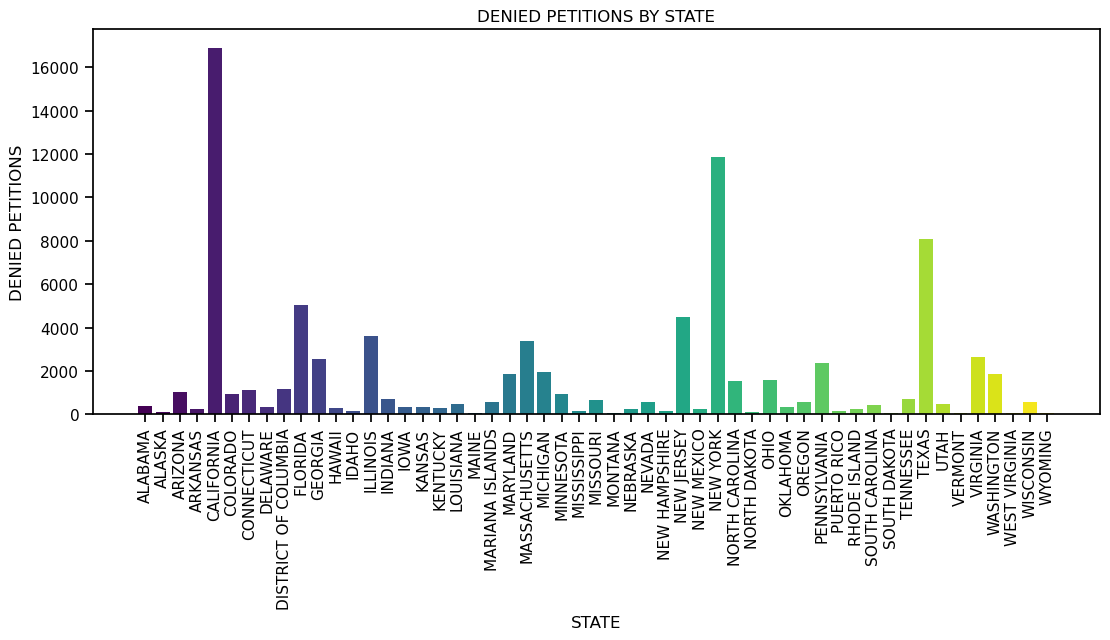

In [70]:
num_bars = len(state_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

fig, ax = plt.subplots(figsize=(13,5))
ax.bar(denied_state['STATE'],denied_state['Count'], color=colors)
ax.set_xlabel('STATE')
ax.set_ylabel('DENIED PETITIONS')
ax.set_title('DENIED PETITIONS BY STATE')
ax.set_xticks(state_counts['STATE'],state_counts['STATE'],rotation=90)
plt.show()

## % Rate of Denied Petitions by State 

In [71]:
t_pet = df['STATE'].value_counts().reset_index()
t_pet.columns=['STATE','Total Petitions']

denied_pet = denied['STATE'].value_counts().reset_index()
denied_pet.columns=['STATE','Count']

merg_df = pd.merge(t_pet, denied_pet,on='STATE',how='left')
merg_df['Denied Percentage'] = round((merg_df['Count']/merg_df['Total Petitions'])*100,1)
merg_df = merg_df.sort_values(by='STATE')

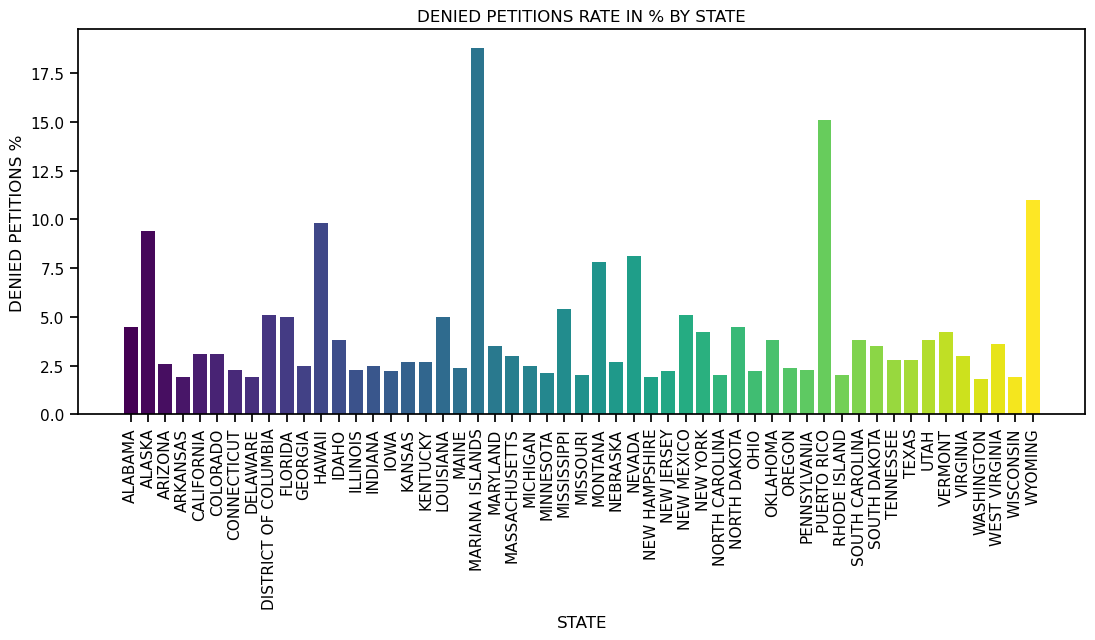

In [72]:
num_bars = len(state_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

fig, ax = plt.subplots(figsize=(13,5))
ax.bar(merg_df['STATE'],merg_df['Denied Percentage'], color=colors)
ax.set_xlabel('STATE')
ax.set_ylabel('DENIED PETITIONS %')
ax.set_title('DENIED PETITIONS RATE IN % BY STATE')
ax.set_xticks(state_counts['STATE'],state_counts['STATE'],rotation=90)
plt.show()

#### Find out how many applied for Illinois State and how many how them are Denied 

In [73]:
df['STATE'].unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA', 'WISCONSIN',
       'ILLINOIS', 'DISTRICT OF COLUMBIA', 'NORTH CAROLINA',
       'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA', 'NEW YORK',
       'INDIANA', 'MARYLAND', 'MASSACHUSETTS', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'HAWAII', 'UTAH', 'DELAWARE', 'MARIANA ISLANDS', 'KANSAS',
       'CONNECTICUT', 'MAINE', 'OKLAHOMA', 'ARKANSAS', 'PUERTO RICO',
       'ALASKA', 'IOWA', 'OREGON', 'KENTUCKY', 'NEBRASKA', 'NEW MEXICO',
       'WEST VIRGINIA', 'SOUTH DAKOTA', 'NORTH DAKOTA', 'MISSISSIPPI',
       'ALABAMA', 'VERMONT', 'IDAHO', 'WYOMING', 'MONTANA'], dtype=object)

In [74]:
illinois_state = df[df['STATE']=='ILLINOIS']
len(illinois_state)

154843

In [75]:
len(illinois_state[illinois_state['CASE_STATUS']=='DENIED'])

3612

#### How Many People are Certified for Job title 'CHIEF PROCESS OFFICER'  who applied for state  Illinois 

In [76]:
chief= illinois_state[illinois_state['JOB_TITLE']=='CHIEF PROCESS OFFICER']
len(chief)

2

In [77]:
chief.reset_index()

,index,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,1295151,CERTIFIED,2014.0,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88
1,1311111,CERTIFIED,2014.0,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88


# Top 25 Job Titles

In [78]:
job = df['JOB_TITLE'].value_counts().head(25)
job

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

In [79]:
colors = plt.cm.viridis(np.linspace(0,1,len(job)))

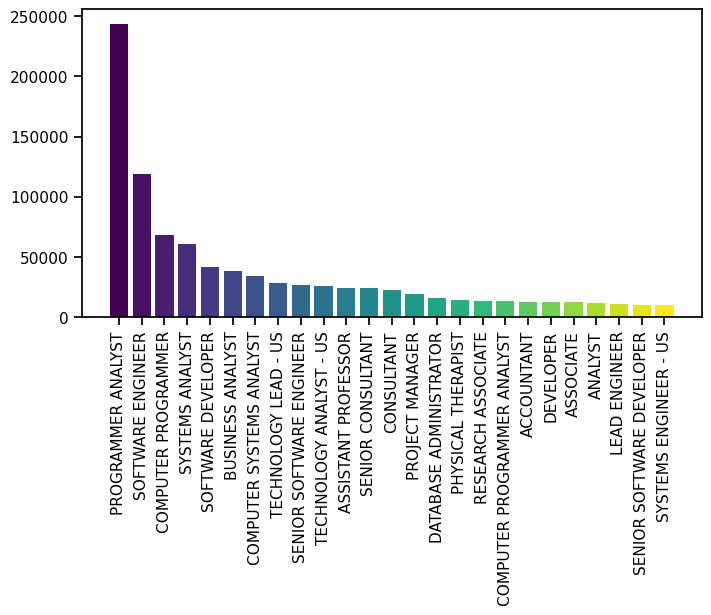

In [80]:
fig,ax = plt.subplots(figsize=(8,4))
ax.bar(df['JOB_TITLE'].value_counts().head(25).index, df['JOB_TITLE'].value_counts().head(25),
      color=colors)
ax.set_xticks(df['JOB_TITLE'].value_counts().head(25).index,df['JOB_TITLE'].value_counts().head(25).index,rotation=90)
plt.show()